In [1]:
packages <- c("edgeR", "dplyr", "magrittr", "ggplot2","anndata","reticulate",
              "tidyr", "reshape", "Seurat", "scales","gplots","reshape2"
              )
lapply(packages, library, character.only = TRUE)

Loading required package: limma


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename


Attaching SeuratObject


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘reshape2’


The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast


The following object is masked from ‘package:tidyr’:

    smiths




[[1]]
[1] "edgeR"     "limma"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[2]]
 [1] "dplyr"     "edgeR"     "limma"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "magrittr"  "dplyr"     "edgeR"     "limma"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "ggplot2"   "magrittr"  "dplyr"     "edgeR"     "limma"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "anndata"   "ggplot2"   "magrittr"  "dplyr"     "edgeR"     "limma"    
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[6]]
 [1] "reticulate" "anndata"    "ggplot2"    "magrittr"   "dplyr"     
 [6] "edgeR"      "limma"      "stats"      "graphics"   "grDevices" 
[11] "utils"      "datasets"   "methods"    "base"      

[[7]]
 [1] "tidyr"      "reticulate" "anndata"    "ggplot2"    "magrittr"  
 [6] "dplyr"      "edgeR"      "limma"      "stats"      "graphics"  
[11] "grDevices"  "utils"      "datasets"   "methods"    "base"      

[[8]]
 [1] "reshape"    "tidyr"      "reticulate" "anndata"    "ggplot2"   
 [6] "magrittr"   "dplyr"      "edgeR"      "limma"      "stats"     
[11] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[16] "base"      

[[9]]
 [1] "SeuratObject" "Seurat"       "reshape"      "tidyr"        "reticulate"  
 [6] "anndata"      "ggplot2"      "magrittr"     "dplyr"        "edgeR"       
[11] "limma"        "stats"        "graphics"     "grDevices"    "utils"       
[16] "datasets"     "methods"      "base"        

[[10]]
 [1] "scales"       "SeuratObject" "Seurat"       "reshape"      "tidyr"       
 [6] "reticulate"   "anndata"      "ggplot2"      "magrittr"     "dplyr"       
[11] "edgeR"        "limma"        "stats"        "graphics"     "grDevices"   
[16] "utils"        "datasets"     "methods"      "base"        

[[11]]
 [1] "gplots"       "scales"       "SeuratObject" "Seurat"       "reshape"     
 [6] "tidyr"        "reticulate"   "anndata"      "ggplot2"      "magrittr"    
[11] "dplyr"        "edgeR"        "limma"        "stats"        "graphics"    
[16] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[12]]
 [1] "reshape2"     "gplots"       "scales"       "SeuratObject" "Seurat"      
 [6] "reshape"      "tidyr"        "reticulate"   "anndata"      "ggplot2"     
[11] "magrittr"     "dplyr"        "edgeR"        "limma"        "stats"       
[16] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[21] "base"

In [2]:
h5ad_file <- "./CTCL/object_revision/all_tumourcell_raw_all_20240707.h5ad"
sdata <- read_h5ad(h5ad_file)
Target_subset <- CreateSeuratObject(counts = t(as.matrix(sdata$X)), meta.data = sdata$obs)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 15.4 GiB”


In [3]:
pseudobulk <- function(seurat_object, column, label){
    seurat_object@meta.data[,column] <- as.character(seurat_object@meta.data[,column])
    tmp <- seurat_object[,seurat_object@meta.data[,column]==label]
    tmp2 <- Matrix::rowSums(tmp@assays$RNA@counts)
    return(tmp2)
}

### column -- donor_id
### label -- each donor

In [4]:
table(Target_subset$donor)


          CTCL1           CTCL2           CTCL3           CTCL4           CTCL5 
           8069            1907            9524            1073            7724 
          CTCL6           CTCL7           CTCL8            MF14            MF15 
           3773            3673            7139            4183            1146 
           MF17            MF21            MF22            MF26            MF28 
           3769            1775             289             628           11438 
           MF30           MF309           MF311           MF312             P65 
           2438           10161           14487             306             814 
            P73             P84             P90            P107            P138 
            331            1822              62            1140             705 
PR001409E_18_1A    PR2533_18_1A PR008096T_19_1A PR018817H_21_1B PR038176R_19_1A 
           2433            1132            3125            6100            1047 
PR839543V_20_1A            

In [5]:
Target_subset$stage <- rep('late', nrow(Target_subset@meta.data))
Target_subset$stage[which(Target_subset$donor == 'CTCL2' |
                          Target_subset$donor == 'CTCL3' |
                          Target_subset$donor == 'CTCL4' |
                          Target_subset$donor == 'CTCL6' |
                          Target_subset$donor == 'CTCL7' |
                          Target_subset$donor == 'CTCL8' |
                          Target_subset$donor == 'MF14' |
                          Target_subset$donor == 'MF15' |
                          Target_subset$donor == 'MF22' |
                          Target_subset$donor == 'MF26' |
                          Target_subset$donor == 'PT50' |
                          Target_subset$donor == 'PR001409E_18_1A' |
                          Target_subset$donor == 'PR038176R_19_1A' |
                          Target_subset$donor == 'PR2533_18_1A' |
                          Target_subset$donor == 'P65' |
                          Target_subset$donor_id == 'P90' |
                          Target_subset$donor_id == 'P107' |
                          Target_subset$donor_id == 'P138')] <- 'early'

In [6]:
table(Target_subset$stage)


early  late 
41271 90924 

In [7]:
mat <- c()
coln <- c()
for (name in as.vector(sort(unique(Target_subset$donor)))) {
     pp <- pseudobulk(Target_subset, 'donor', name)
     mat <- cbind(mat, pp)
     coln <- c(coln, name)
} 
colnames(mat) <- coln
rownames(mat) <- rownames(Target_subset@assays$RNA@counts)
#mat <- mat[VariableFeatures(object = Target_subset), ]
dim(mat)

[1] 15649    39

In [8]:
Condition <- "late" #### Physiological conditions

control <- as.vector(unique(Target_subset$donor
                            [which(Target_subset$stage != Condition)]))
mut <- as.vector(unique(Target_subset$donor
                        [which(Target_subset$stage == Condition)]))
sub <- c(control, mut)
mat_sub <- mat[, sub]
groups <- factor(c(rep(1, length(control)), rep(2, length(mut))))

In [9]:
groups

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2
Levels: 1 2

#### correction studies/batch

In [16]:
sub

[1] "CTCL6"           "CTCL7"           "CTCL8"           "CTCL2"          
 [5] "CTCL3"           "CTCL4"           "PT50"            "MF26"           
 [9] "MF22"            "MF14"            "MF15"            "PR001409E_18_1A"
[13] "PR2533_18_1A"    "PR038176R_19_1A" "P107"            "P138"           
[17] "P65"             "P90"             "CTCL1"           "CTCL5"          
[21] "PT52"            "PT11"            "PT56"            "PT53"           
[25] "PT55"            "PT47"            "PT35"            "MF30"           
[29] "MF17"            "MF21"            "MF28"            "PR008096T_19_1A"
[33] "PR018817H_21_1B" "PR839543V_20_1A" "MF309"           "MF311"          
[37] "MF312"           "P73"             "P84"

In [18]:
groups <- factor(c(rep(1, length(control)), rep(2, length(mut))))
study <- factor(c(rep('Sanger_Ncl',6),
                  'MDA',
                  rep('PKU', 4),
                  rep('Flex', 3),
                  rep('Vienna', 4),
                  rep('Sanger_Ncl',2), 
                  rep('MDA',7),
                  rep('PKU',4),
                  rep('Flex',3),
                  rep('Vienna', 5)))

In [19]:
study

[1] Sanger_Ncl Sanger_Ncl Sanger_Ncl Sanger_Ncl Sanger_Ncl Sanger_Ncl
 [7] MDA        PKU        PKU        PKU        PKU        Flex      
[13] Flex       Flex       Vienna     Vienna     Vienna     Vienna    
[19] Sanger_Ncl Sanger_Ncl MDA        MDA        MDA        MDA       
[25] MDA        MDA        MDA        PKU        PKU        PKU       
[31] PKU        Flex       Flex       Flex       Vienna     Vienna    
[37] Vienna     Vienna     Vienna    
Levels: Flex MDA PKU Sanger_Ncl Vienna

In [20]:
#########edgeR#########
DEGs <- DGEList(counts=mat_sub, group=groups)
DEGs$samples <- cbind(DEGs$samples, study)

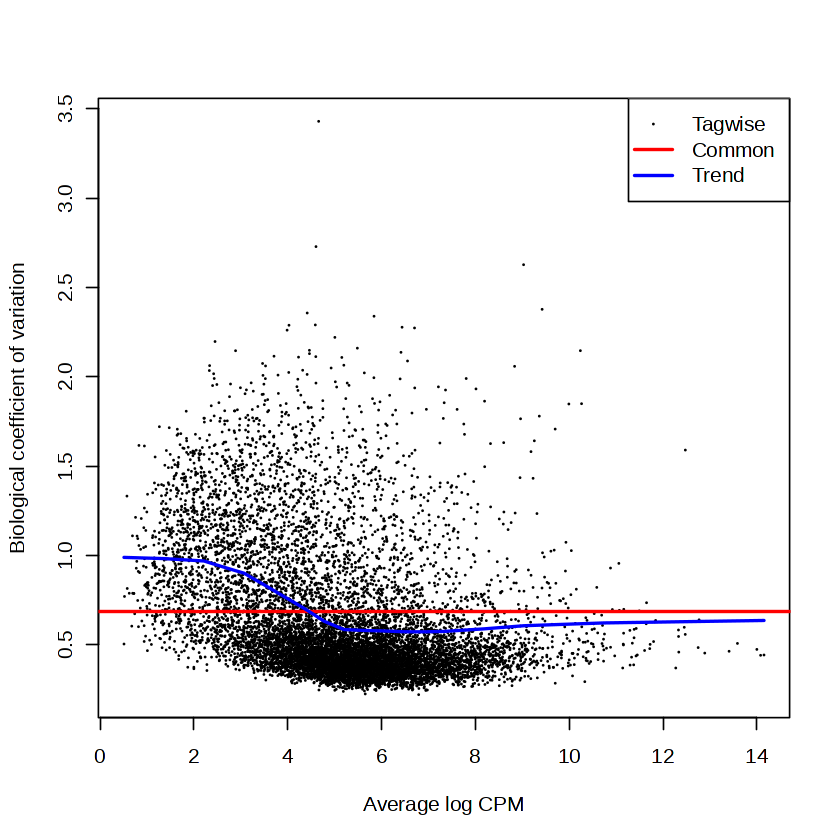

In [21]:
#keep <- filterByExpr(DEGs, min.count=10, min.total.count=50)
keep <- filterByExpr(DEGs)
DEGs <- DEGs[keep, , keep.lib.sizes=FALSE]

DEGs <- calcNormFactors(DEGs)

cdr <- scale(colMeans(mat_sub > 0))
#design <- model.matrix(~cdr+groups)
design <- model.matrix(~study+groups)

DEGs <- estimateDisp(DEGs, design = design)
fit <- glmQLFit(DEGs, design = design)
qlf <- glmQLFTest(fit,coef=2)
tt <- topTags(qlf, n = Inf)
plotBCV(DEGs)

et <- exactTest(DEGs)
et_FDR <- topTags(et, n = nrow(et$table), adjust.method = "BH", sort.by = "PValue", p.value = 1)

out_temp <- et_FDR$table

In [22]:
edge_mut_up <- out_temp[which(out_temp$FDR<0.1), ]


In [24]:
edge_mut_up %>% head

,logFC,logCPM,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>
ZBED2,-4.634390,5.302242,2.419963e-11,2.630016e-07
CTNNA1,-1.452181,6.366854,2.108976e-08,1.146017e-04
PLCG2,-3.111240,4.804075,8.106163e-08,2.936593e-04
NCKAP5L,1.482797,3.214762,1.867155e-07,4.362358e-04
ZBTB46,-3.215053,3.649418,2.006974e-07,4.362358e-04
TUT7,-1.047247,5.944260,2.820009e-07,5.107977e-04


In [26]:
write.table(out_temp, 
            file='./DEGs_tumourcell_stage_with_correction_study_fdr_all.xls',
            quote = F, col.names=T, row.names=T,sep='\t')